##Imports

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

#Prepare the Dataset

Load the MNIST data from TFDS into train and test sets. Define a preprocessing function to normalize and flatten the images
* Since this is an autoencoder, the model will be trained with `image, image` since the input will also be the target or label when training

In [5]:
def map_image(image, label):
  """
  Normalize and faltten the images
  
  Returns:
    image as input and label
  """

  image = tf.cast(image, dtype=tf.float32)
  image /= 255.0

  image = tf.reshape(image, shape=(784,))
  return image, image

In [7]:
#Load the train adn test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split='train')
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split='test')
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

##Build the Model 
Build a simple autoencoder to take in the data 

In [8]:
def simple_autoencoder(inputs):
  """
  Builds the encoder and decoder using Dense layers
  """

  encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)

  return encoder, decoder

In [10]:
#Set the input shape
inputs = tf.keras.layers.Input(shape=(784,))

#Get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

#Setup the encoder because the output will be visualize later 
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

#Setup the autoencoder 
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

#Compile the Model

In [11]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy'
)

##Train the Model

In [12]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset,
                                            steps_per_epoch = train_steps, 
                                            epochs = 50)

Epoch 1/50
468/468 [==============================] - 11s 23ms/step - loss: 0.2284
Epoch 2/50
468/468 [==============================] - 8s 17ms/step - loss: 0.1427
Epoch 3/50
468/468 [==============================] - 8s 17ms/step - loss: 0.1189
Epoch 4/50
468/468 [==============================] - 7s 16ms/step - loss: 0.1071
Epoch 5/50
468/468 [==============================] - 8s 17ms/step - loss: 0.1007
Epoch 6/50
468/468 [==============================] - 8s 18ms/step - loss: 0.0973
Epoch 7/50
468/468 [==============================] - 7s 15ms/step - loss: 0.0955
Epoch 8/50
468/468 [==============================] - 8s 17ms/step - loss: 0.0947
Epoch 9/50
468/468 [==============================] - 8s 18ms/step - loss: 0.0942
Epoch 10/50
468/468 [==============================] - 7s 15ms/step - loss: 0.0939
Epoch 11/50
468/468 [==============================] - 7s 16ms/step - loss: 0.0937
Epoch 12/50
468/468 [==============================] - 7s 15ms/step - loss: 0.0935
Epoch 13/50


##Display sample results 

In [18]:

def display_one_row(disp_images, offset, shape=(28, 28)):
  """Display sample outputs in one row."""
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')

def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8, 4)):
  """Display the input, encoded, and decoded output values."""
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28, 28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28, 28,))

In [16]:
print(decoder_output[0])

KerasTensor(type_spec=TensorSpec(shape=(784,), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


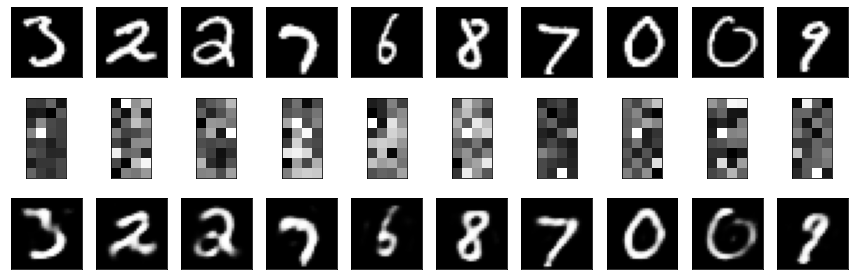

In [19]:
#Take 1 batch of the dataset 
test_dataset = test_dataset.take(1)

#Take the input images and put them in a list 
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
  output_samples = input_image

#Pick 10 random numbers to be used as indices to the list above 
idxs = np.random.choice(BATCH_SIZE, size=10)

#Get the encoder output 
encoded_predicted = encoder_model.predict(test_dataset)

#get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

#Display the 10 samples, encodings and decoded values
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])
